In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [3]:
# original
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', index_col=0)
mutation_counts = pd.DataFrame(df.sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
lowly_recurrent = list(mutation_counts[mutation_counts['count'] <= 5].mutation)
mediumly_recurrent = list(mutation_counts[(mutation_counts['count'] > 5)&(mutation_counts['count'] <=20)].mutation)
highly_recurrent = list(mutation_counts[mutation_counts['count'] > 20].mutation)
print len(highly_recurrent), len(mediumly_recurrent), len(lowly_recurrent)

28 149 841


In [4]:
# cgc
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cgc_new.TCGA.conservative.mut.ClassII.csv', index_col=0)
mutation_counts = pd.DataFrame(df.sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
lowly_recurrent = list(mutation_counts[mutation_counts['count'] <= 5].mutation)
mediumly_recurrent = list(mutation_counts[(mutation_counts['count'] > 5)&(mutation_counts['count'] <=20)].mutation)
highly_recurrent = list(mutation_counts[mutation_counts['count'] > 20].mutation)
print len(highly_recurrent), len(mediumly_recurrent), len(lowly_recurrent)

4 27 1078


In [5]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [23]:
value_types = []

In [24]:
# passenger
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/passenger.all.csv', index_col=0)
values = get_values_from_df(df)
value_types.append(values)

In [25]:
# lowly recurrent
category = 'oncogenes'
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cgc_new.TCGA.conservative.mut.ClassII.csv'.format(category),
                 index_col=0).transpose()
app_restricted_space = [x for x in lowly_recurrent if x in df.index]
values = get_values_from_df(df.ix[app_restricted_space, :])
value_types.append(values)

In [26]:
# lowly recurrent
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cgc_new.TCGA.conservative.mut.ClassII.csv'.format(category),
                 index_col=0).transpose()
app_restricted_space = [x for x in mediumly_recurrent if x in df.index]
values = get_values_from_df(df.ix[app_restricted_space, :])
value_types.append(values)

In [27]:
# highly recurrent
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cgc_new.TCGA.conservative.mut.ClassII.csv'.format(category),
                 index_col=0).transpose()
app_restricted_space = [x for x in highly_recurrent if x in df.index]
values = get_values_from_df(df.ix[app_restricted_space, :])
value_types.append(values)

In [28]:
df.shape

(1109, 5942)

In [29]:
plotting = pd.DataFrame({'recurrency': ['passenger' for x in value_types[0]] + ['low' for x in value_types[1]] + ['medium' for x in value_types[2]] + ['high' for x in value_types[3]],
                         'PHBR': value_types[0] + value_types[1] + value_types[2] + value_types[3]})

In [30]:
for cat in ['passenger', 'low', 'medium', 'high']:
    print cat, mean(plotting[plotting.recurrency == cat].PHBR < 6)

passenger 0.254618106996
low 0.208444462207
medium 0.114614109229
high 0.000210366879838


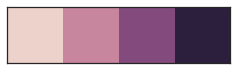

In [31]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
colors = sns.cubehelix_palette(4)
sns.palplot(colors)

In [32]:
plotting.recurrency.value_counts()

passenger    7290000
low          6405476
medium        160434
high           23768
Name: recurrency, dtype: int64

In [33]:
#print sp.mannwhitneyu(plotting[plotting.recurrency == 'passenger'].PHBR, plotting[plotting.recurrency == 'low'].PHBR)
#print sp.mannwhitneyu(plotting[plotting.recurrency == 'low'].PHBR, plotting[plotting.recurrency == 'medium'].PHBR)
#print sp.mannwhitneyu(plotting[plotting.recurrency == 'medium'].PHBR, plotting[plotting.recurrency == 'high'].PHBR)

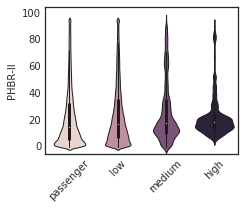

In [34]:
plt.figure(figsize=(3.5, 3))
sns.violinplot(x='recurrency', y='PHBR', data=plotting,
              palette=colors)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('PHBR-II')
plt.ylim(-5, 105)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/recurrency.cgc_genes.pdf')

In [18]:
fraction = {}
for cat in ['passenger', 'low', 'medium', 'high']:
    fraction[cat] = []
for x in np.arange(0, 31, 1):
    print x
    for cat in ['passenger', 'low', 'medium', 'high']:
        fraction[cat].append(mean(plotting[plotting.recurrency == cat].PHBR < x))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


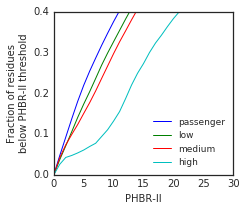

In [19]:
plt.figure(figsize=(3.5, 3))
for cat in ['passenger', 'low', 'medium', 'high']:
    plt.plot(np.arange(0, 31, 1), fraction[cat], label=cat)
plt.legend(loc=4)
plt.xlim(0, 30)
plt.ylim(0, 0.4)
plt.ylabel('Fraction of residues\nbelow PHBR-II threshold')
plt.xlabel('PHBR-II')
plt.locator_params(axis='y', nbins=6)
L = plt.legend(loc=4, prop={'size': 9})
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/recurrency.cdf.pdf')

Fraction below plot:

In [14]:
def threshold(x):
    if x < 10:
        return 1
    else:
        return 0
plotting['PHBR_Threshold'] = plotting.PHBR.apply(threshold)

In [15]:
plotting.head()

,PHBR,category,recurrency,PHBR_Threshold
0,25.366790,neither,passenger,0
1,12.865381,neither,passenger,0
2,23.470557,neither,passenger,0
3,16.396217,neither,passenger,0
4,16.605717,neither,passenger,0


In [16]:
plotting_thresholds = pd.DataFrame({'Recurrency': ['Passenger', 'Low', 'Medium', 'High'],
                                    'Fraction': [plotting[plotting.recurrency == 'passenger'].PHBR_Threshold.mean(),
                                                 plotting[plotting.recurrency == 'low'].PHBR_Threshold.mean(),
                                                 plotting[plotting.recurrency == 'medium'].PHBR_Threshold.mean(),
                                                 plotting[plotting.recurrency == 'high'].PHBR_Threshold.mean()]})

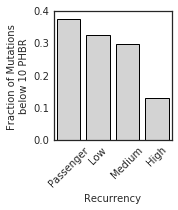

In [17]:
plt.figure(figsize=(2.5, 3))
sns.barplot(x='Recurrency', y='Fraction', data=plotting_thresholds, color='lightgrey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Fraction of Mutations\nbelow 10 PHBR')
plt.locator_params(axis='y', nbins=5)
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/recurrency.threshold.pdf')

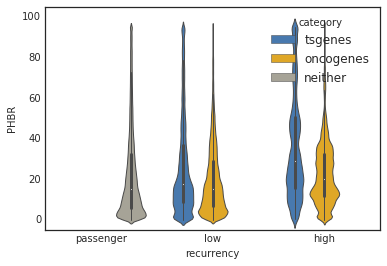

In [16]:
sns.violinplot(x='recurrency', y='PHBR', hue='category', data=plotting, hue_order=['tsgenes', 'oncogenes', 'neither'],
              palette=sns.xkcd_palette(colors))
plt.ylim(-5, 105)
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/recurrency.category.pdf')